<h1>On Galerkin approximations for the QG equations</h1> 
<h2>Supplementary material for subsection on the $\beta-$Eady model</h2>
<h3>Wave structure for Charney mode</h3>

<p></p>
</h3>Cesar B. Rocha*</h3>
</h3>, William R. Young, and Ian Grooms </h3>
<p></p>
</h4>Winter 2015 </h4>
<p></p>
*Scripps Institution of Oceanography, University of California, San Diego, 9500 Gilman Dr. MC 0213, La Jolla, CA/USA, <crocha@ucsd.edu>



In [23]:
from __future__ import division

import numpy as np
from numpy import pi, sqrt,cos

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.25})
%matplotlib inline

import seaborn as sns
#sns.set(style="darkgrid")
sns.set_context("paper", font_scale=5, rc={"lines.linewidth": 1.5})

### A function to compute difference matrices

In [24]:
def D_matrices(N):
    ''' create an N x N difference matrices 
    
    D1 :: first-order, centered difference
    D2 :: second-order, centered difference 
                
                                            '''
    D2 = np.zeros((N,N))
    D1 = np.zeros((N,N))
    for i in range(N):
        D2[i,i] = -2.
        if i<N-1: 
            D2[i,i+1],D1[i,i+1] = 1.,-1
        if i>0: 
            D2[i,i-1],D1[i,i-1] = 1.,1.
    return D1,D2

### Load data

In [25]:
data_path = 'linear_charney_num_kappa_8.npz'
charney = np.load(data_path)

kappa = charney['kappa']
phi_max = charney['e_num'][1:-1]  # do no consider ghost points
N = charney['N']

# the critical level
zc = charney['c_num'].real - 1.   # recall the domain has depth 1

### set up domain

In [27]:
# vertical coordinate
dz = 1./N   # vertical resolution
z = np.arange(-dz/2,-1.-dz/2.,-dz)  # level array 

# horizontal coordinate
x = np.linspace(0,np.pi,100)

# grid
X,Z = np.meshgrid(x,z)

### compute wavestructure
We solved the problem for the streamfunction $\phi$ vertical structure. The streamfunction is them 

\begin{equation}
\psi = |\phi(z)|\cos{(i k x +P_{\psi}(z))}
\end{equation}

The associated PV is

\begin{equation}
q = \partial^2_{xx}\psi + \partial^2_{zz}\psi = (-k^2\,|\phi(z)| + \partial^2_{zz}\,\,|\phi(z)| - |\phi(z)|(\partial_zP_{\psi}(z))^2)) \cos{(i k x +P_{\psi}(z)}) -(2\partial_z|\phi(z)|\partial_z P_{\psi}(z)) \sin{(i k x +P_{\psi}(z)})\,
\end{equation}


The phase is
\begin{equation}
P_{\psi}(z) = \text{tan$^{-1}$}\frac{\text{Im}(\hat{\psi})}{\text{Re}(\hat{\psi})}\,.
\end{equation}

In [29]:
# wave structure in xz-plane
phi_max_abs = np.abs(phi_max)
phi_max_phase = np.arctan2(phi_max.imag,phi_max.real)

phase = np.repeat(phi_max_phase,x.size).reshape(z.size,x.size)
mag = np.repeat(phi_max_abs,x.size).reshape(z.size,x.size)

# wave structure
PSI = mag*np.cos( kappa*X + phase )

phi = charney['e_num'][:]
phi_abs = np.abs(phi)
phi_phase = np.arctan2(phi.imag,phi.real)

D1,D2 = D_matrices(N+2)
D1,D2 = np.matrix(D1),np.matrix(D2)
 
phi_abs_prime = np.array(D1*np.matrix(phi_abs).T)[1:-1]/(2*dz)
phi_abs_dprime = np.array(D2*np.matrix(phi_abs).T)[1:-1]/(dz**2)
phi_phase_prime = np.array(D1*np.matrix(phi_phase).T)[1:-1]/(2*dz)
phi_phase_dprime = np.array(D2*np.matrix(phi_phase).T)[1:-1]/(dz**2)

mag_prime =  np.repeat(phi_abs_prime,x.size).reshape(z.size,x.size)
mag_dprime =  np.repeat(phi_abs_dprime,x.size).reshape(z.size,x.size)

phase_prime =  np.repeat(phi_phase_prime,x.size).reshape(z.size,x.size)
phase_dprime =  np.repeat(phi_phase_dprime,x.size).reshape(z.size,x.size)

cost = np.cos( kappa*X + phase)
sint = np.sin( kappa*X + phase)

PV = (-(kappa**2)*mag + mag_dprime - mag*(phase_prime**2) )*cost \
        - (2.*mag_prime*phase_prime + mag*phase_dprime)*sint


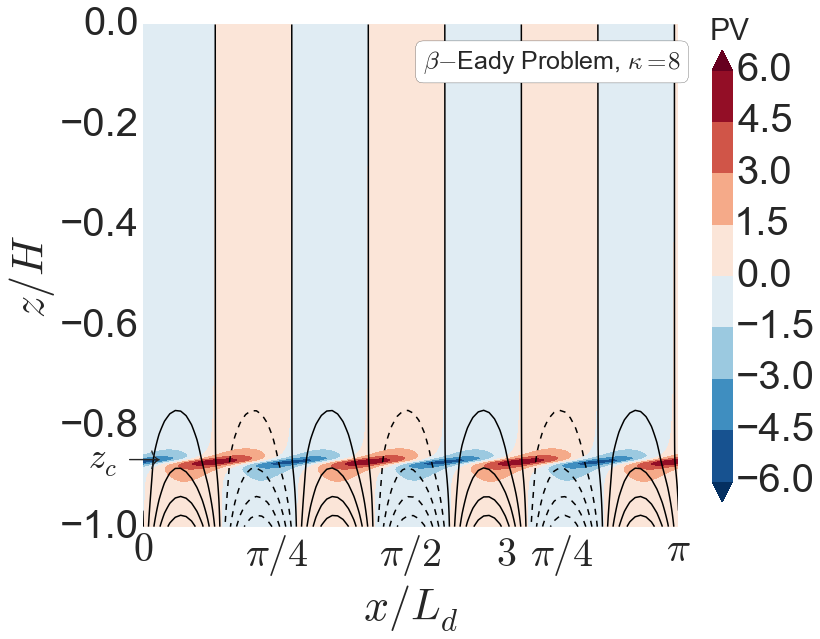

In [30]:
lw = 2.
aph = .5

# PV and psi wave structure
plt.figure(figsize=(12,9))
plt.contour(X,Z,1e2*PSI,np.linspace(-10,10,9),colors='k')      
plt.contourf(X,Z,PV,np.linspace(-6.,6.,9),cmap='RdBu_r',extend='both') 
#plt.plot(x,np.ones(x.size)*zc,'w--',linewidth=lw,alpha=1)
plt.text(-0.375,zc-.01,r' $z_c \rightarrow$',fontsize=35)

cb = plt.colorbar(extend='both',shrink=.9)
cb.ax.text(.0,1.075,'PV',rotation=0,fontsize=30)

plt.text(2.4, -.075, r"$\beta-$Eady Problem, $\kappa = 8$", size=25, rotation=0.,\
            ha="center", va="center",\
            bbox = dict(boxstyle="round",ec='k',fc='w'))

plt.xticks([0.,pi/4,pi/2,3*pi/4,pi],[r'$0$',r'$\pi/4$',r'$\pi/2$',\
            r'$3\,\pi/4$',r'$\pi$'])

plt.ylabel('$z/H$')
plt.xlabel(r'$x/L_d$')

plt.savefig('figs/wave-structure_pv_psi_kappa_8_num.eps')